## Decision Tree Visualization

### Decision Tree
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each node finds the best threshold on that feature to further classify/predict more accurately, each branch represents an outcome of that threshold, and each leaf node holds a class label.
<br><br>
<img src="./data/image1.PNG">

In [34]:
from matplotlib import pyplot as plt # For plotting
from sklearn import datasets # For loading standard datasets
from sklearn.tree import DecisionTreeClassifier # To run decision tree model
from sklearn import tree # to visualize decision trees
import numpy as np

#### Iris Dataset Description:
- Classes: 3
- Samples per class: 50
- Samples total: 150
- Dimesionaltiy: 4
- Source: https://archive.ics.uci.edu/ml/datasets/iris

<br>
<strong>Quick Tip:</strong> sklearn.datasets has some toy datasets, the package also has helpers to fetch larger datasets commonly used by the machine learning community

In [35]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [36]:
# Initialize the model
clf = DecisionTreeClassifier(max_features=4)
# Fir the model
clf.fit(X,y)

DecisionTreeClassifier(max_features=4)

## Task
- Train your own decision tree and play with the following hyper-parameters then state your observations on at least 15 different hyper-parameter settings. Following are only some of the parameters:
    - __Must read__: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    - max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    - min_samples_split : The minimum number of samples required to split an internal node.
    - min_samples_leaf : The minimum number of samples required to be at a leaf node. This may have the effect of smoothing the model, especially in regression.
    - random state :  Controls the randomness of the estimator
    
- Write a function to calculate the accuracy
- Print accuracies for each hyper-parameter setting used. Print in following format:
    ```
    1. PARAMS[random_state=1, max_depth=....] , Accuracy=0.97
    2. PARAMS[random_state=42, min_samples_split=....] , Accuracy=0.94
    ..
    .
    ```
- Perform the same set of acitvites on different dataset: https://gist.github.com/kudaliar032/b8cf65d84b73903257ed603f6c1a2508


In [37]:
# initialise and then Fit the classifier
params=[{'random_state':1,'max_depth':4,'min_samples_split':5,'min_samples_leaf':5},
       {'random_state':42,'max_depth':3,'min_samples_split':10,'min_samples_leaf':3},
       {'random_state':5,'max_depth':2,'min_samples_split':3,'min_samples_leaf':5},
       {'random_state':42,'max_depth':5,'min_samples_split':4,'min_samples_leaf':1},
       {'random_state':42,'max_depth':4,'min_samples_split':2,'min_samples_leaf':2},
       {'random_state':2,'max_depth':5,'min_samples_split':6,'min_samples_leaf':5},
       {'random_state':7,'max_depth':6,'min_samples_split':10,'min_samples_leaf':5},
       {'random_state':8,'max_depth':5,'min_samples_split':12,'min_samples_leaf':7},
       {'random_state':11,'max_depth':3,'min_samples_split':7,'min_samples_leaf':4},
       {'random_state':15,'max_depth':2,'min_samples_split':5,'min_samples_leaf':8},
       {'random_state':19,'max_depth':1,'min_samples_split':5,'min_samples_leaf':2},
       {'random_state':40,'max_depth':7,'min_samples_split':5,'min_samples_leaf':1},
       {'random_state':3,'max_depth':8,'min_samples_split':3,'min_samples_leaf':10},
       {'random_state':5,'max_depth':9,'min_samples_split':2,'min_samples_leaf':4},
       {'random_state':3,'max_depth':1,'min_samples_split':5,'min_samples_leaf':5}]
clf=[i for i in range(15)]
for i in range(15):
    clf[i] = DecisionTreeClassifier(**params[i])
    clf[i].fit(X, y)
    print(str(i+1)+". PARAMS [",end=' ')
    for j,k in params[i].items():
        print(j+"="+str(k)+",",end=' ')
    print("], Accuracy = ",end=' ') 
    print(clf[i].score(X,y),end=' ')
    print()

1. PARAMS [ random_state=1, max_depth=4, min_samples_split=5, min_samples_leaf=5, ], Accuracy =  0.9733333333333334 
2. PARAMS [ random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=3, ], Accuracy =  0.9733333333333334 
3. PARAMS [ random_state=5, max_depth=2, min_samples_split=3, min_samples_leaf=5, ], Accuracy =  0.96 
4. PARAMS [ random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=1, ], Accuracy =  0.9866666666666667 
5. PARAMS [ random_state=42, max_depth=4, min_samples_split=2, min_samples_leaf=2, ], Accuracy =  0.98 
6. PARAMS [ random_state=2, max_depth=5, min_samples_split=6, min_samples_leaf=5, ], Accuracy =  0.9733333333333334 
7. PARAMS [ random_state=7, max_depth=6, min_samples_split=10, min_samples_leaf=5, ], Accuracy =  0.9733333333333334 
8. PARAMS [ random_state=8, max_depth=5, min_samples_split=12, min_samples_leaf=7, ], Accuracy =  0.96 
9. PARAMS [ random_state=11, max_depth=3, min_samples_split=7, min_samples_leaf=4, ], Accuracy =  0.

In [38]:
print("It seems that with relatively higher max depth, accuracy is higher as well")

It seems that with relatively higher max depth, accuracy is higher as well


In [39]:
# Gives text representation to the decision tree trained
text_representation = ['' for i in range(15)]
x=''
for i in range(15):
    text_representation[i] = tree.export_text(clf[i])
    x+="Model "+str(i)+'\n'
    x+=text_representation[i]
    x+='\n'
print(x)

Model 0
|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_0 <= 5.15
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.15
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2

Model 1
|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2

Model 2
|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- class: 2

Model 3
|--- fe

In [40]:
# To save the above info in a text file
with open("decistion_tree.log", "w") as fout:
    fout.write(x)

### Github Dataset Decision Tree

In [8]:
%cd "C:\Users\RAGHAV VERMA\Documents\JupyterStuff\AI-ML-Labs\week-4\"

C:\Users\RAGHAV VERMA\Documents\JupyterStuff\AI-ML-Labs\week-4


In [11]:
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv("data/golf-dataset.csv")
df.head()
print(df.Outlook.unique())
print(df.Temp.unique())
print(df.Humidity.unique())
print(df.Windy.unique())
print(df['Play Golf'].unique())

['Rainy' 'Overcast' 'Sunny']
['Hot' 'Mild' 'Cool']
['High' 'Normal']
[False  True]
['No' 'Yes']


In [13]:
df.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [14]:
df["Play Golf"]=df["Play Golf"].apply(lambda x : 1 if x=='Yes' else 0)
df["Windy"]=df["Windy"].apply(lambda x : 1 if x==True else 0)
df.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,0,0
1,Rainy,Hot,High,1,0
2,Overcast,Hot,High,0,1
3,Sunny,Mild,High,0,1
4,Sunny,Cool,Normal,0,1


In [15]:
outlook=pd.get_dummies(df.Outlook)
temp=pd.get_dummies(df.Temp)
finaldf=pd.concat([outlook,temp,df["Windy"],df["Play Golf"]],axis=1)
finaldf.head()

,Overcast,Rainy,Sunny,Cool,Hot,Mild,Windy,Play Golf
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0
2,1,0,0,0,1,0,0,1
3,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1


In [16]:
X=finaldf.iloc[:,0:7].values
y=finaldf.iloc[:,-1].values

In [21]:
# initialise and then Fit the classifier
params=[{'random_state':1,'max_depth':4,'min_samples_split':5,'min_samples_leaf':5},
       {'random_state':42,'max_depth':3,'min_samples_split':10,'min_samples_leaf':3},
       {'random_state':5,'max_depth':2,'min_samples_split':3,'min_samples_leaf':5},
       {'random_state':42,'max_depth':5,'min_samples_split':4,'min_samples_leaf':1},
       {'random_state':42,'max_depth':4,'min_samples_split':2,'min_samples_leaf':2},
       {'random_state':2,'max_depth':5,'min_samples_split':6,'min_samples_leaf':5},
       {'random_state':7,'max_depth':6,'min_samples_split':10,'min_samples_leaf':5},
       {'random_state':8,'max_depth':5,'min_samples_split':12,'min_samples_leaf':7},
       {'random_state':11,'max_depth':3,'min_samples_split':7,'min_samples_leaf':4},
       {'random_state':15,'max_depth':2,'min_samples_split':5,'min_samples_leaf':8},
       {'random_state':19,'max_depth':1,'min_samples_split':5,'min_samples_leaf':2},
       {'random_state':40,'max_depth':7,'min_samples_split':5,'min_samples_leaf':1},
       {'random_state':3,'max_depth':8,'min_samples_split':3,'min_samples_leaf':10},
       {'random_state':5,'max_depth':9,'min_samples_split':2,'min_samples_leaf':4},
       {'random_state':3,'max_depth':1,'min_samples_split':5,'min_samples_leaf':5}]
clf=[i for i in range(15)]
for i in range(15):
    clf[i] = DecisionTreeClassifier(**params[i])
    clf[i].fit(X, y)
    print(str(i+1)+". PARAMS [",end=' ')
    for j,k in params[i].items():
        print(j+"="+str(k)+",",end=' ')
    print("], Accuracy = ",end=' ') 
    print(clf[i].score(X,y),end=' ')
    print()

1. PARAMS [ random_state=1, max_depth=4, min_samples_split=5, min_samples_leaf=5, ], Accuracy =  0.7142857142857143 
2. PARAMS [ random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=3, ], Accuracy =  0.7857142857142857 
3. PARAMS [ random_state=5, max_depth=2, min_samples_split=3, min_samples_leaf=5, ], Accuracy =  0.7142857142857143 
4. PARAMS [ random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=1, ], Accuracy =  0.8571428571428571 
5. PARAMS [ random_state=42, max_depth=4, min_samples_split=2, min_samples_leaf=2, ], Accuracy =  0.8571428571428571 
6. PARAMS [ random_state=2, max_depth=5, min_samples_split=6, min_samples_leaf=5, ], Accuracy =  0.7142857142857143 
7. PARAMS [ random_state=7, max_depth=6, min_samples_split=10, min_samples_leaf=5, ], Accuracy =  0.7142857142857143 
8. PARAMS [ random_state=8, max_depth=5, min_samples_split=12, min_samples_leaf=7, ], Accuracy =  0.6428571428571429 
9. PARAMS [ random_state=11, max_depth=3, min_samples_spli

In [22]:
# Gives text representation to the decision tree trained
text_representation = ['' for i in range(15)]
x=''
for i in range(15):
    text_representation[i] = tree.export_text(clf[i])
    x+="Model "+str(i)+'\n'
    x+=text_representation[i]
    x+='\n'
print(x)

Model 0
|--- feature_1 <= 0.50
|   |--- class: 1
|--- feature_1 >  0.50
|   |--- class: 0

Model 1
|--- feature_0 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1

Model 2
|--- feature_1 <= 0.50
|   |--- class: 1
|--- feature_1 >  0.50
|   |--- class: 0

Model 3
|--- feature_0 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1

Model 4
|--- feature_0 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 0
|   

In [23]:
with open("githubmodeltrees.log", "w") as fout:
    fout.write(x)

### How to Visualize Decision Trees using Matplotlib
Scikit-learn version >=0.21.0 allows Decision Trees to be plotted with matplotlib using 'sklearn.tree.plot_tree'

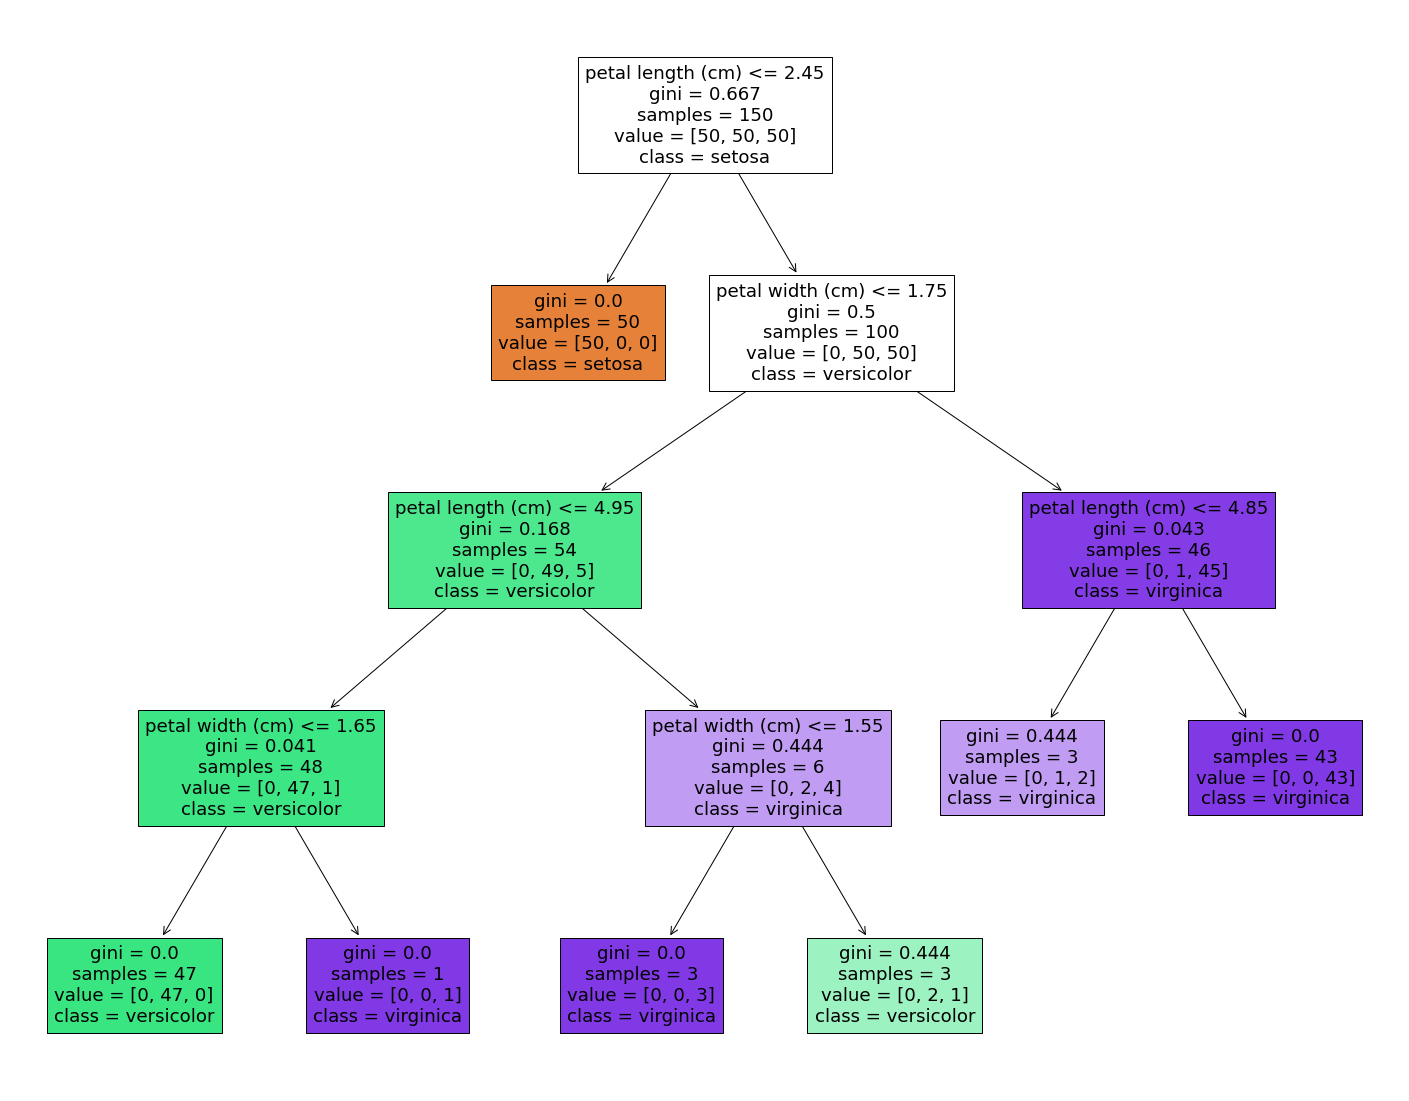

In [41]:
# Visualize the results in a beautiful manner using sklearn plot_tree
# Look documentation for modifying fonts: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf[11], 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

 ##### In the above figure color of the nodes represent the majoritiy of the class

In [42]:
# TODO: Write accuracy function here
def accuracy(y_true,y_pred):
    accuracys=np.sum(y_true==y_pred)*(1/y_true.shape[0])
    return accuracys



In [43]:
# TODO: Print 15 hyperparam settings along with accuracy
params=[{'random_state':1,'max_depth':4,'min_samples_split':5,'min_samples_leaf':5},
       {'random_state':42,'max_depth':3,'min_samples_split':10,'min_samples_leaf':3},
       {'random_state':5,'max_depth':2,'min_samples_split':3,'min_samples_leaf':5},
       {'random_state':42,'max_depth':5,'min_samples_split':4,'min_samples_leaf':1},
       {'random_state':42,'max_depth':4,'min_samples_split':2,'min_samples_leaf':2},
       {'random_state':2,'max_depth':5,'min_samples_split':6,'min_samples_leaf':5},
       {'random_state':7,'max_depth':6,'min_samples_split':10,'min_samples_leaf':5},
       {'random_state':8,'max_depth':5,'min_samples_split':12,'min_samples_leaf':7},
       {'random_state':11,'max_depth':3,'min_samples_split':7,'min_samples_leaf':4},
       {'random_state':15,'max_depth':2,'min_samples_split':5,'min_samples_leaf':8},
       {'random_state':19,'max_depth':1,'min_samples_split':5,'min_samples_leaf':2},
       {'random_state':40,'max_depth':7,'min_samples_split':5,'min_samples_leaf':1},
       {'random_state':3,'max_depth':8,'min_samples_split':3,'min_samples_leaf':10},
       {'random_state':5,'max_depth':9,'min_samples_split':2,'min_samples_leaf':4},
       {'random_state':3,'max_depth':1,'min_samples_split':5,'min_samples_leaf':5}]
clf=[i for i in range(15)]
for i in range(15):
    clf[i] = DecisionTreeClassifier(**params[i])
    clf[i].fit(X, y)
    print(str(i+1)+". PARAMS [",end=' ')
    for j,k in params[i].items():
        print(j+"="+str(k)+",",end=' ')
    print("], Accuracy = ",end=' ') 
    print(accuracy(y,clf[i].predict(X)),end=' ')
    print()



1. PARAMS [ random_state=1, max_depth=4, min_samples_split=5, min_samples_leaf=5, ], Accuracy =  0.9733333333333334 
2. PARAMS [ random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=3, ], Accuracy =  0.9733333333333334 
3. PARAMS [ random_state=5, max_depth=2, min_samples_split=3, min_samples_leaf=5, ], Accuracy =  0.9600000000000001 
4. PARAMS [ random_state=42, max_depth=5, min_samples_split=4, min_samples_leaf=1, ], Accuracy =  0.9866666666666667 
5. PARAMS [ random_state=42, max_depth=4, min_samples_split=2, min_samples_leaf=2, ], Accuracy =  0.9800000000000001 
6. PARAMS [ random_state=2, max_depth=5, min_samples_split=6, min_samples_leaf=5, ], Accuracy =  0.9733333333333334 
7. PARAMS [ random_state=7, max_depth=6, min_samples_split=10, min_samples_leaf=5, ], Accuracy =  0.9733333333333334 
8. PARAMS [ random_state=8, max_depth=5, min_samples_split=12, min_samples_leaf=7, ], Accuracy =  0.9600000000000001 
9. PARAMS [ random_state=11, max_depth=3, min_samples_spli

In [44]:
# Save the figure
fig.savefig("decistion_tree.png")

### How to visualize decision trees using graphviz

If you get runtime error with graphviz, refer to
- https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks.

In [28]:
!pip install graphviz

In [45]:
%cd "C:/Graphviz 2.44.1/bin"


C:\Graphviz 2.44.1\bin


In [46]:
!dot -c

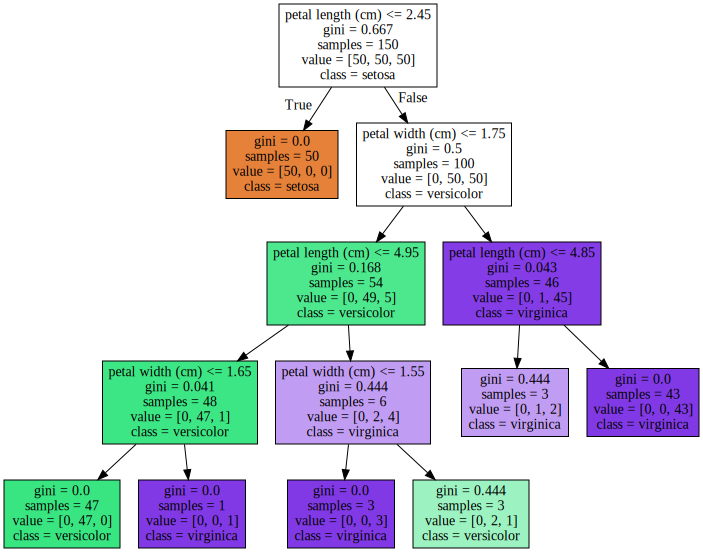

In [47]:
import graphviz

# DOT data - since graphviz accepts data in DOT we will convert our tree into a compatable format 
dot_data = tree.export_graphviz(clf[11], out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [48]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### Resources
- https://mljar.com/blog/visualize-decision-tree/ (source code)
- https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
- https://explained.ai/decision-tree-viz/
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html